# Strategy One: Bollinger Bands

Bollinger Bands are great to observe the volatility of a given investment over a period of time. It is based on the simple moving average (SMA) of the investment adding the standard deviation of the SMA.

Basic trading strategy using the Bollinger Bands indicator which will shoot a buy signal if the stock price of the previous day is greater than the previous day's lower band and the current stock price is lesser than the current day’s lower band. 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import requests
import math
from termcolor import colored as cl 
import numpy as np

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

In [ ]:
!pip install yfinance

In [ ]:
from yfinance import Ticker
def get_ohlc(ticker, period='60d', interval='5m'):
  cols = ['Open','High','Low','Close']
  ohlc = Ticker(ticker).history(period=period, interval=interval)[cols][:-1]
  return ohlc

In [ ]:
df1 = get_ohlc('ETH-USD')

In [ ]:
def SMovingAve(data, window):
    sma = data.rolling(window = window).mean()
    return sma

In [ ]:
df1['SMA_20'] = SMovingAve(df1['Close'], 3*12*24)

In [ ]:
def BollingerBand(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

In [ ]:
df1['HigherBB'], df1['LowerBB'] = BollingerBand(df1['Close'], df1['SMA_20'], 3*12*24)

In [ ]:
df1.tail(10)

,Open,High,Low,Close,SMA_20,HigherBB,LowerBB
Datetime,,,,,,,
2022-04-03 17:20:00+00:00,3491.813232,3491.813232,3489.792969,3489.997314,3416.592292,3594.868489,3238.316095
2022-04-03 17:25:00+00:00,3488.405762,3488.405762,3487.097900,3487.097900,3416.829461,3594.934722,3238.724201
2022-04-03 17:30:00+00:00,3486.160645,3486.160645,3484.440674,3486.042969,3417.053101,3595.019971,3239.086231
2022-04-03 17:35:00+00:00,3485.872070,3487.883545,3485.872070,3487.574219,3417.278709,3595.108181,3239.449236
2022-04-03 17:40:00+00:00,3487.341064,3489.909180,3487.341064,3489.842041,3417.503826,3595.207531,3239.800121
2022-04-03 17:45:00+00:00,3490.189453,3490.606934,3489.426514,3489.426514,3417.731546,3595.298867,3240.164225
2022-04-03 17:50:00+00:00,3489.350586,3489.350586,3488.393066,3488.942627,3417.951476,3595.400168,3240.502784
2022-04-03 17:55:00+00:00,3489.739990,3491.666748,3489.739990,3491.286621,3418.175955,3595.504279,3240.847631
2022-04-03 18:00:00+00:00,3491.157959,3493.252686,3491.157959,3493.252686,3418.411527,3595.597175,3241.225879


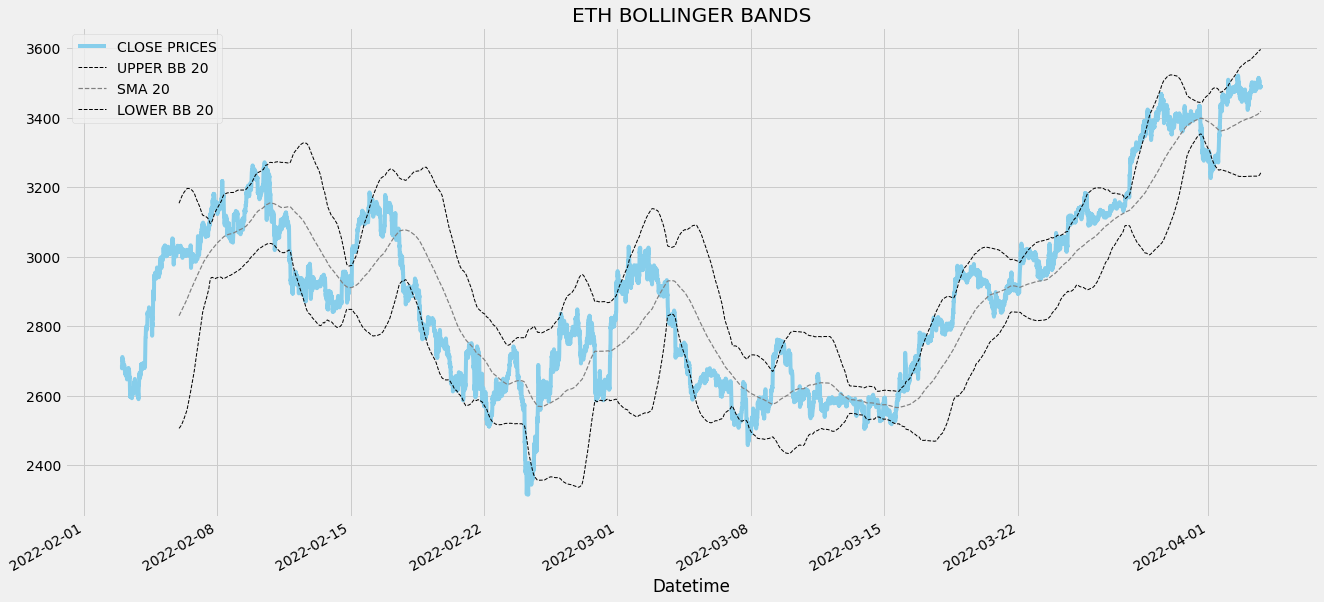

In [ ]:
df1['Close'].plot(label = 'CLOSE PRICES', color = 'skyblue')
df1['HigherBB'].plot(label = 'UPPER BB 20', linestyle = '--', linewidth = 1, color = 'black')
df1['SMA_20'].plot(label = 'SMA 20', linestyle = '--', linewidth = 1.2, color = 'grey')
df1['LowerBB'].plot(label = 'LOWER BB 20', linestyle = '--', linewidth = 1, color = 'black')
plt.legend(loc = 'upper left')
plt.title('ETH BOLLINGER BANDS')
plt.show()

In [ ]:
def BollingBandStrategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

In [ ]:
buy_price, sell_price, bb_signal = BollingBandStrategy(df1['Close'], df1['LowerBB'], df1['HigherBB'])

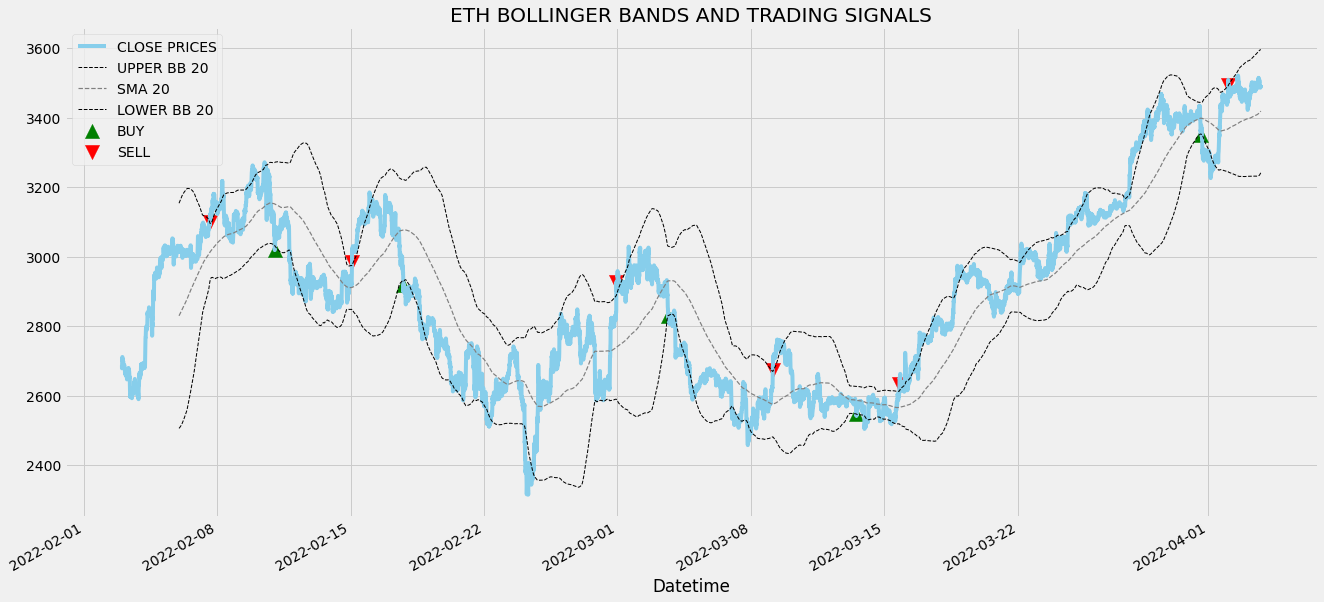

In [ ]:
df1['Close'].plot(label = 'CLOSE PRICES', color = 'skyblue')
df1['HigherBB'].plot(label = 'UPPER BB 20', linestyle = '--', linewidth = 1, color = 'black')
df1['SMA_20'].plot(label = 'SMA 20', linestyle = '--', linewidth = 1.2, color = 'grey')
df1['LowerBB'].plot(label = 'LOWER BB 20', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(df1.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(df1.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.legend(loc = 'upper left')
plt.title('ETH BOLLINGER BANDS AND TRADING SIGNALS')
plt.show()

In [ ]:
df1['pct_change1'] = df1['Close'].pct_change()

In [ ]:
position = []
for i in range(len(bb_signal)):
    if bb_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(df1['Close'])):
    if bb_signal[i] == 1:
        position[i] = 1
    elif bb_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]

In [ ]:
ret = pd.DataFrame(np.diff(df1['close'])).rename(columns = {0:'returns'})
bb_strategy_ret = []

for i in range(len(tsla_ret)):
    try:
        returns = tsla_ret['returns'][i]*strategy['bb_position'][i]
        bb_strategy_ret.append(returns)
    except:
        pass
    
bb_strategy_ret_df = pd.DataFrame(bb_strategy_ret).rename(columns = {0:'bb_returns'})

investment_value = 100000
number_of_stocks = math.floor(investment_value/df1['close'][-1])
bb_investment_ret = []

for i in range(len(bb_strategy_ret_df['bb_returns'])):
    returns = number_of_stocks*bb_strategy_ret_df['bb_returns'][i]
    bb_investment_ret.append(returns)

bb_investment_ret_df = pd.DataFrame(bb_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(bb_investment_ret_df['investment_returns']), 2)
profit_percentage = math.floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from the BB strategy by investing $100k in TSLA : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the BB strategy : {}%'.format(profit_percentage), attrs = ['bold']))

# Correlation Analysis

And price characteristics - daily returns and histogram of daily returns. Scatter chart of returns and correlation analysis. Can easily extend to multiple number of investments being analysed.

In [4]:
import yfinance as yf

In [ ]:
import matplotlib.pyplot as plt

In [103]:
tickers = ['msft', 'aapl', 'goog', 'tsla']
df2 = yf.download(tickers, start="2021-03-31", end="2022-03-31")

[*********************100%***********************]  4 of 4 completed


In [104]:
df2_close = df2['Adj Close']

Text(0.5, 0.98, 'Portfolio Summary')

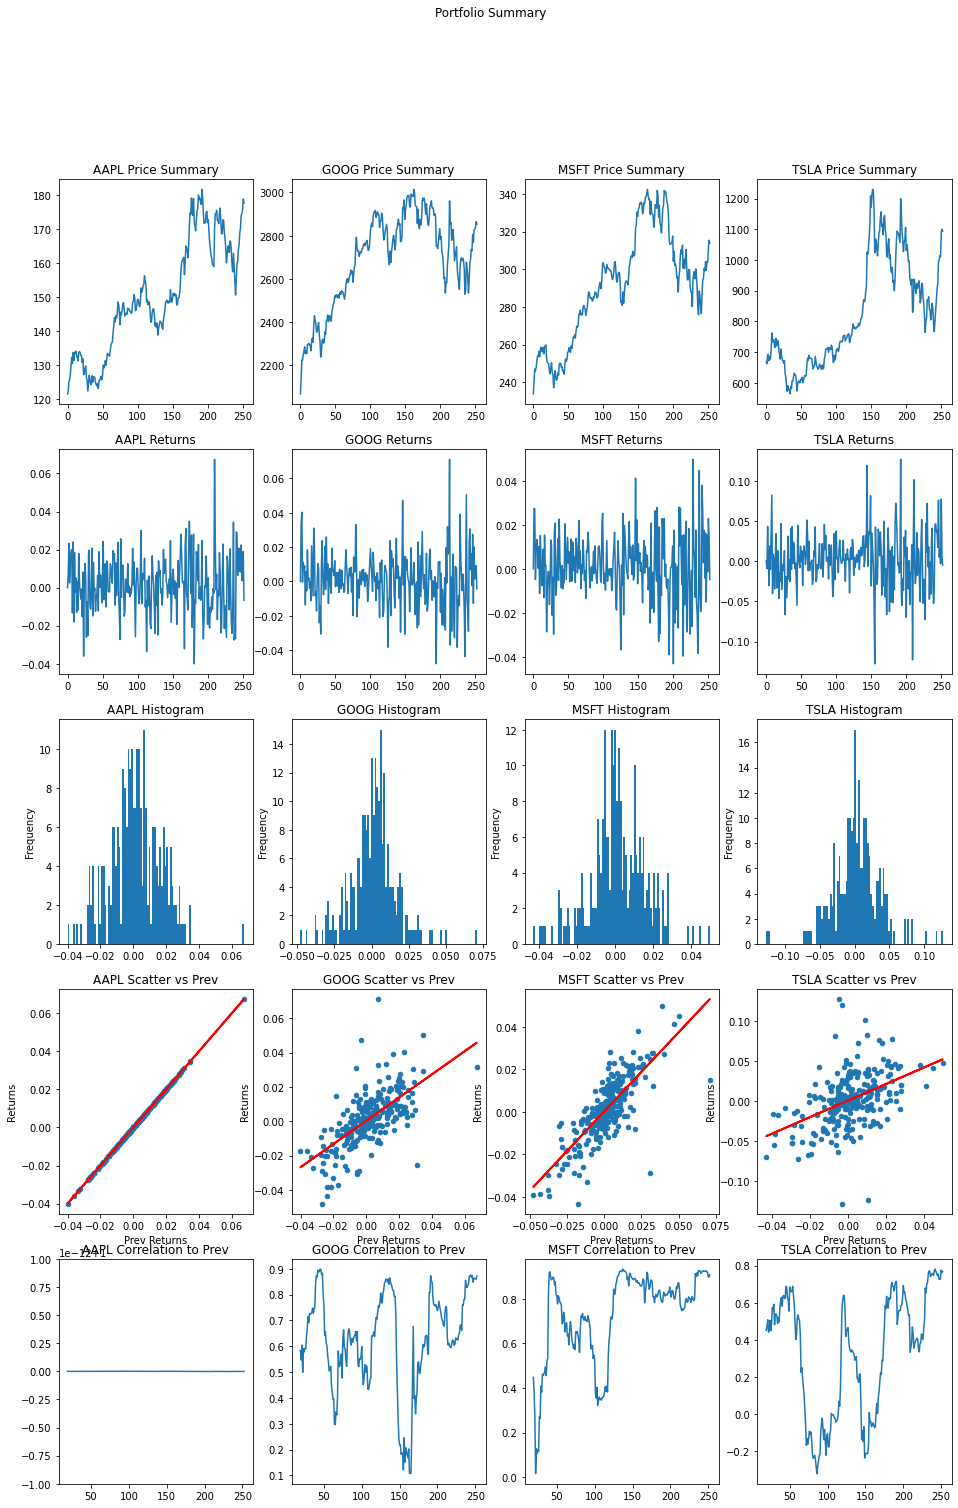

In [112]:
fig, axs = plt.subplots(5, 4)
fig.set_size_inches(16,24)
old_df = pd.DataFrame()
x = 0

for col in df2_close.columns:

    selected_series = df2_close[col].values.tolist()
    analysis = pd.DataFrame(selected_series.copy())
    analysis.columns = ["Price"]
    analysis['Returns'] = np.log(analysis["Price"] / analysis["Price"].shift(1))
    analysis = analysis.fillna(0)
    analysis["Price"].plot(title="{} Price Summary".format(col), ax=axs[0,x])
    analysis['Returns'].plot(title="{} Returns".format(col), ax=axs[1,x])
    analysis['Returns'].plot(kind='hist', bins=100, orientation='vertical', title="{} Histogram".format(col), ax=axs[2,x])
    
    if x == 0:
        analysis['Prev Returns'] = analysis['Returns']
    else: analysis['Prev Returns'] = old_df

    regression = np.polyfit(analysis['Prev Returns'], analysis['Returns'], deg=1)
    analysis[['Prev Returns', 'Returns']].plot(kind='scatter', title="{} Scatter vs Prev".format(col), x="Prev Returns", y="Returns", ax=axs[3,x])
    axs[3,x].plot(analysis['Prev Returns'], np.polyval(regression, analysis['Prev Returns']), 'r', lw=2)

    analysis['Prev Returns'].rolling(window=20).corr(analysis['Returns']).plot(title="{} Correlation to Prev".format(col), ax=axs[4,x])
    axs[4,x].axhline(analysis['Returns'].corr().iloc[0,1], c='r')

    x += 1
    old_df = analysis['Returns']

# handles, labels = axs[0,0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='center right')

fig.suptitle("Portfolio Summary")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbfb329f0d0>,
      dtype=object)

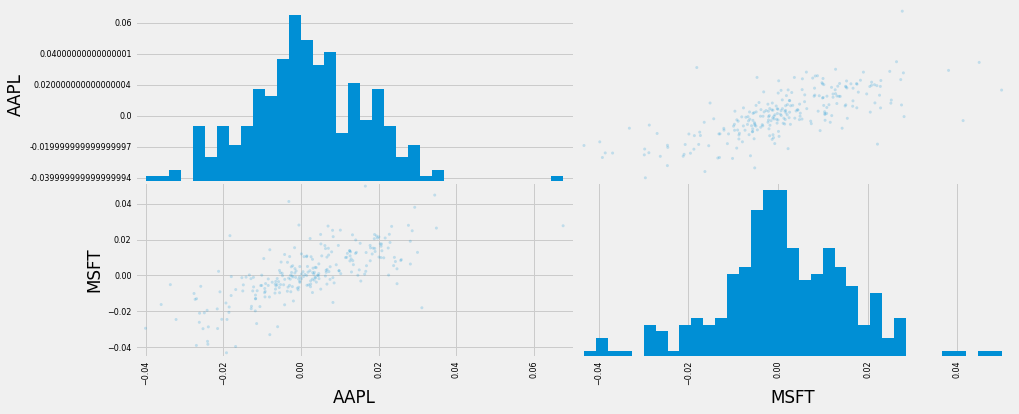

In [ ]:
pd.plotting.scatter_matrix(returns, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(14,6))

In [113]:
import seaborn as sns

In [114]:
returns = np.log(df2['Adj Close']/ df2['Adj Close'].shift(1))
returns.dropna(inplace=True)

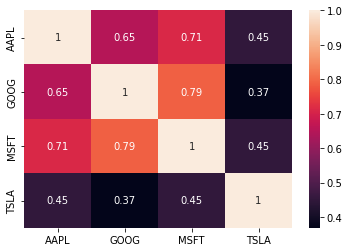

In [115]:
sns.heatmap(returns.corr(), xticklabels=returns.columns, yticklabels=returns.columns, annot=True)

# Portfolio Optimisation